# Line detection

$\mathrm{LiMe}$ includes a [intensity threshold](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2631518/) to confirm the presence of lines prior to their measurements. In this guide, we are going to show how the user can access these functions

Let's create an observation:

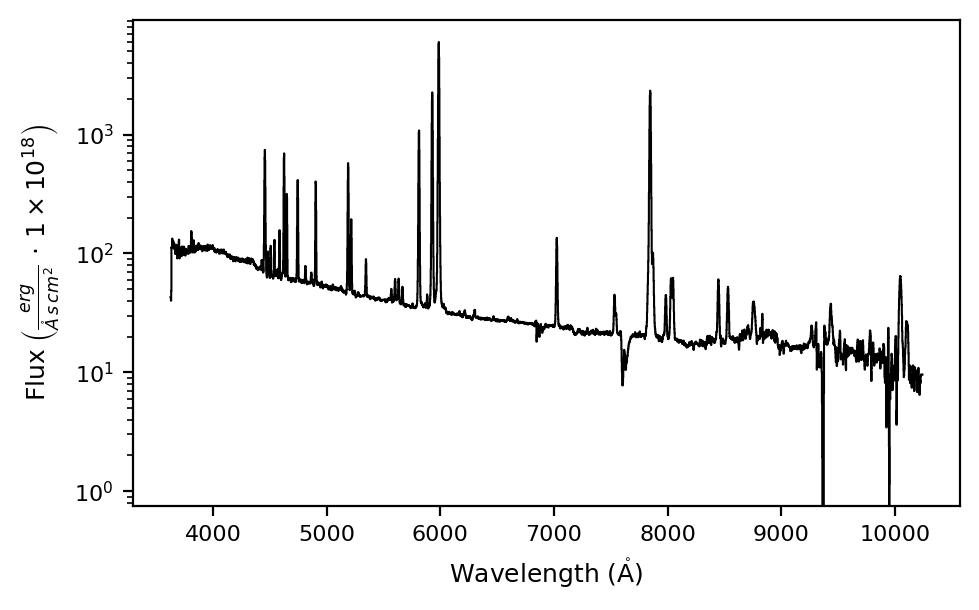

In [7]:
import numpy as np
from astropy.io import fits
from pathlib import Path
import lime

# State the input files
obsFitsFile = '../sample_data/spectra/gp121903_osiris.fits'
cfgFile = '../sample_data/osiris.toml'

# Spectrum parameters
z_obj = 0.19531
norm_flux = 1e-18

# Create the observation object
gp_spec = lime.Spectrum.from_file(obsFitsFile, instrument='osiris', redshift=z_obj, norm_flux=norm_flux)
gp_spec.plot.spectrum(log_scale=True)

The first step is to get an estimation of the continuum as we showed in the [previous guide](https://lime-stable.readthedocs.io/en/latest/guides/1_continuum_fitting.html):

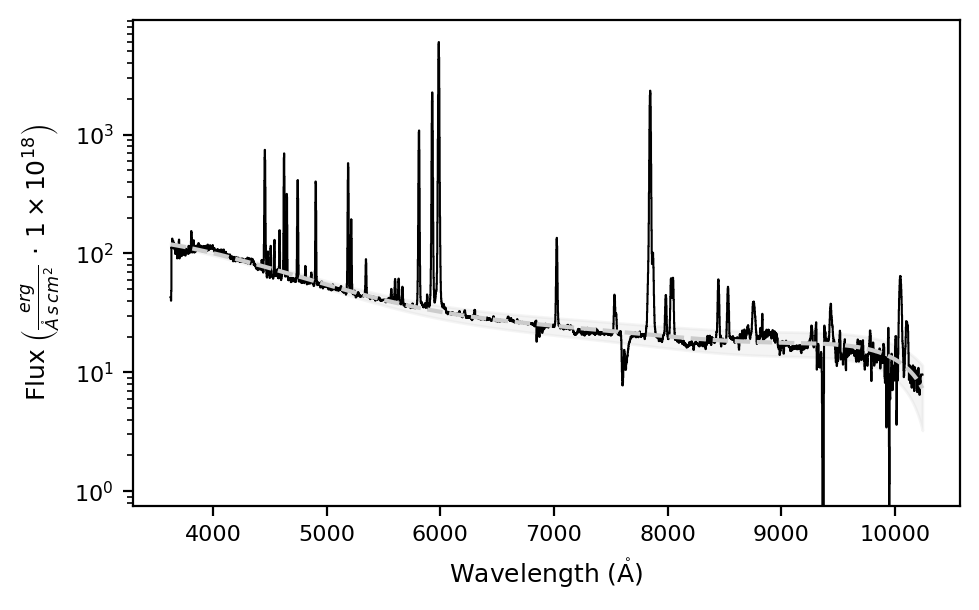

In [8]:
# Fit the object continuum:
gp_spec.fit.continuum(degree_list=[3, 6, 6], emis_threshold=[3, 2, 1.5])

# Plot the observation with the fitted continuum and its mean standard deviation
gp_spec.plot.spectrum(include_cont=True, log_scale=True)

Before, fitting the lines we are going to get the default database trimmed to the observation wavelength range:

In [13]:
obj_bands = gp_spec.retrieve.line_bands()
obj_bands[0:10]

,wavelength,wave_vac,w1,w2,w3,w4,w5,w6,latex_label,units_wave,particle,transition,rel_int
Ne5_3426A,3426.0000,3426.0000,3390.000000,3410.000000,3419.862200,3432.137800,3445.000000,3465.000000,$[NeV]3426\mathring{A}$,Angstrom,Ne5,col,0.0
H1_3704A,3703.8013,3704.9132,3671.309441,3681.364925,3697.403195,3710.199405,3758.000000,3764.000000,$HI3704\mathring{A}$,Angstrom,H1,rec,0.0
O2_3726A,3726.0300,3727.1000,3665.750000,3694.260000,3719.611341,3732.448659,3754.880000,3767.500000,$[OII]3726\mathring{A}$,Angstrom,O2,col,0.0
O2_3729A,3728.8200,3729.8600,3665.750000,3694.260000,3722.399263,3735.240737,3754.880000,3767.500000,$[OII]3729\mathring{A}$,Angstrom,O2,col,0.0
H1_3750A,3750.0998,3751.2244,3664.503848,3675.720417,3743.658777,3756.540823,3775.220000,3792.040000,$HI3750\mathring{A}$,Angstrom,H1,rec,0.0
H1_3771A,3770.5779,3771.7081,3759.191222,3767.280375,3764.117970,3777.037830,3776.807987,3782.905843,$HI3771\mathring{A}$,Angstrom,H1,rec,0.0
H1_3798A,3797.8450,3798.9827,3780.949179,3792.078244,3791.359920,3804.330080,3807.127865,3816.774280,$HI3798\mathring{A}$,Angstrom,H1,rec,0.0
H1_3835A,3835.3309,3836.4789,3823.148476,3829.538777,3828.809917,3841.851883,3844.260000,3852.830000,$HI3835\mathring{A}$,Angstrom,H1,rec,0.0
Ne3_3869A,3868.7029,3869.8600,3848.429950,3858.099497,3862.151682,3875.254118,3895.538694,3910.048413,$[NeIII]3869\mathring{A}$,Angstrom,Ne3,col,0.0
H1_3889A,3888.9950,3890.1577,3842.087829,3861.282614,3882.423873,3895.566127,3905.000000,3950.000000,$HI3889\mathring{A}$,Angstrom,H1,rec,0.0


As you can see, this list a very large list and the lines observed depend on the astronomical object nature and the observation depth. So now we are going to use the $\tt{lime.Spectrum.infer.peaks\_troughs}$ function to match the theoretical wavelengths to the peaks observed:

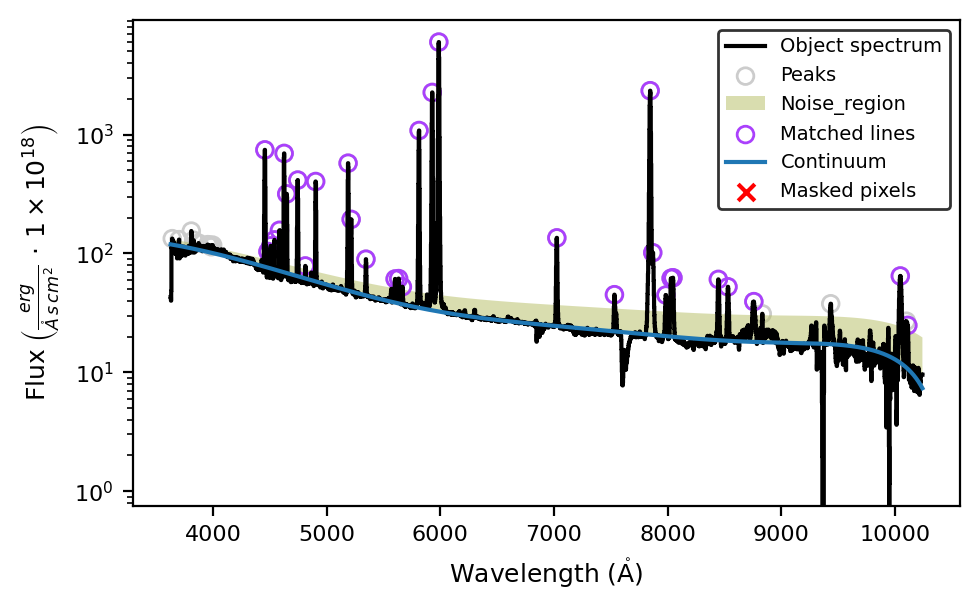

In [17]:
obj_bands = gp_spec.infer.peaks_troughs(obj_bands, emission_type=True, sigma_threshold=3, plot_steps=True, log_scale=True)

The plot from the ``plot_steps=True`` let's understand better how to adjust the function inputs:
 * The ``emission_type=True`` argument limits the detection to peaks.
 * The shaded area represents the ``sigma_threshold`` times the ``spectrum.cont_std`` above which there is peak detection.
 * The bold circles represent the peaks matched to theoretical transitions, while the pale circles are unmatched peaks.

To evaluate the bands width you can use the ``bands`` argument on the $\tt{lime.Spectrum.plot.spectrum}$ function:

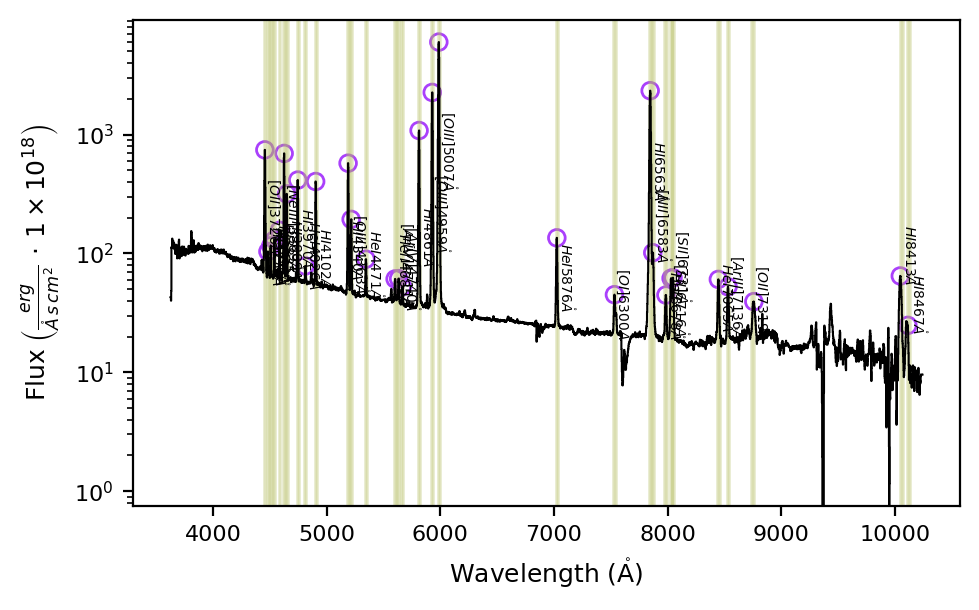

In [16]:
gp_spec.plot.spectrum(bands=obj_bands, log_scale=True)

## Takeaways
* After you have fitted the continuum for your observation, you can run the $\tt{lime.Spectrum.infer.peaks\_troughs}$ function to detect peaks and troughs above a certain factor the continuum flux standard deviation.
* This function compares the detected peaks/troughs against the input bands theoretical transitions wavelengths.
* The user should still make sure that the input bands are appropiate for single/blended lines.
* These functions arguments can help to adjust the outputs to the user needs. You can read the function documentation on the [API](https://lime-stable.readthedocs.io/en/latest/reference/API.html)